# Abstract
Music Genre classification is very important in today’s world due to rapid growth in music tracks, both online and offline. In order to have better access to these we need to index them accordingly. Automatic music genre classification is important to obtain music from a large collection. Most of the current music genre classification techniques uses machine learning techniques. In this paper, we present a music dataset which includes ten different genres. A Deep Learning approach is used in order to train and classify the system. Here convolution neural network is used for training and classification. Feature Extraction is the most crucial task for audio analysis. Mel Frequency Cepstral Coefficient (MFCC) is used as a feature vector for sound sample. The proposed system classifies music into various genres by extracting the feature vector. Our results show that the accuracy level of our system is around 76% and it will greatly improve and facilitate automatic classification of music genres.


# Dataset Used
For this project, the dataset that we will be working with is the GTZAN Music Genre Classification dataset which consists of 1,000 audio tracks, each 30 seconds long. It contains 10 genres, each represented by 100 tracks.
The 10 genres are Blues, Classical, Country, Disco, Hip-hop, Jazz, Metal, Pop, Reggae, Rock.
The dataset has the following folders:

- Genres original — A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

- Images original — A visual representation for each audio file. One way to classify data is through neural networks because NN’s usually take in some sort of image representation.

- 2 CSV files — Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs are split before into 3 seconds audio files.

GTZAN Dataset with CSV- https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

Original GTZAN Dataset- http://marsyas.info/downloads/datasets.html

# Installing necessary libraries 
(Librosa is used for audio data)

In [ ]:
!pip install librosa

In [ ]:
!pip install python_speech_features

In [ ]:
!pip install tensorflow

In [ ]:
!pip install pydot

In [ ]:
!pip install pydub

# Importing Libraries

In [54]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from python_speech_features import mfcc
import random

from scipy import misc
import glob
from PIL import Image
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import random

# Understanding Audio

In [69]:
# Importing 1 file
y, sr = librosa.load('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/genres/rock/rock.00000.wav')

print('y: ', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y:  [-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [71]:
audio_recording='C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/genres/rock/rock.00000.wav'
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [72]:
librosa.load(audio_recording,sr)

(array([-0.03344727, -0.05490112, -0.05435181, ..., -0.08416748,
         0.02886963,  0.1296997 ], dtype=float32),
 22050)

# Playing Audio

In [73]:
import IPython
IPython.display.Audio(data,rate=sr)

# Waveforms
Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. 
They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others.

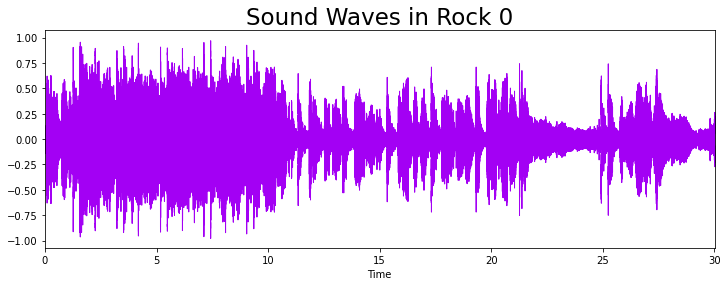

In [75]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="#A300F4")
plt.title("Sound Waves in Rock 0", fontsize = 23);
plt.show()

# Spectrogram
A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time

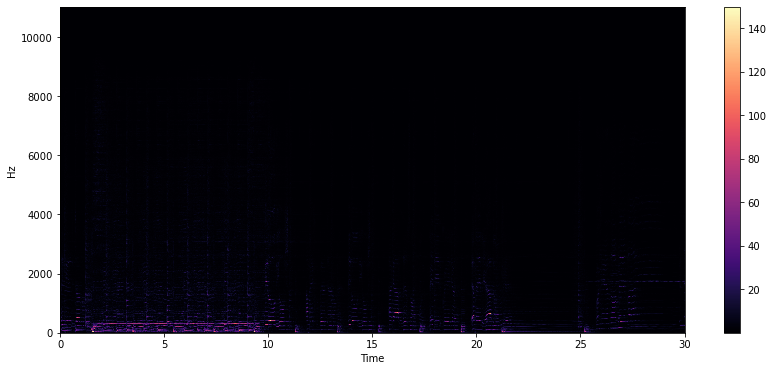

In [76]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

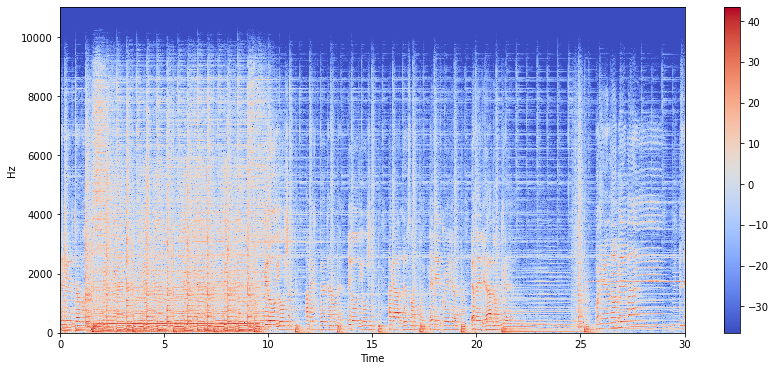

In [77]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

# Mel Spectrogram

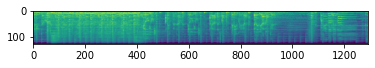

In [78]:
mels = librosa.feature.melspectrogram(data)
fig = plt.Figure()
canvas = FigureCanvas(fig)
p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
p

# MFCC
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.
librosa.feature.mfcc computes MFCCs across an audio signal:

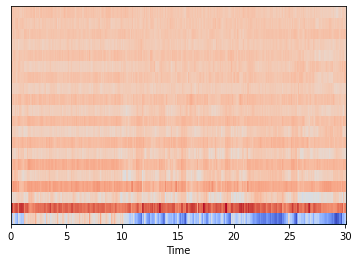

In [80]:
#using classical.00024.wav to display its MFCC
x, fs = librosa.load('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/genres/rock/rock.00000.wav')
librosa.display.waveplot(x, sr=sr)
mfccs = librosa.feature.mfcc(x, sr=fs)
(13, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Spectral Rolloff
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

The roll-off frequency denotes the approximate low bass and high treble limits in a frequency response curve, with all frequencies between being those a speaker will play accurately

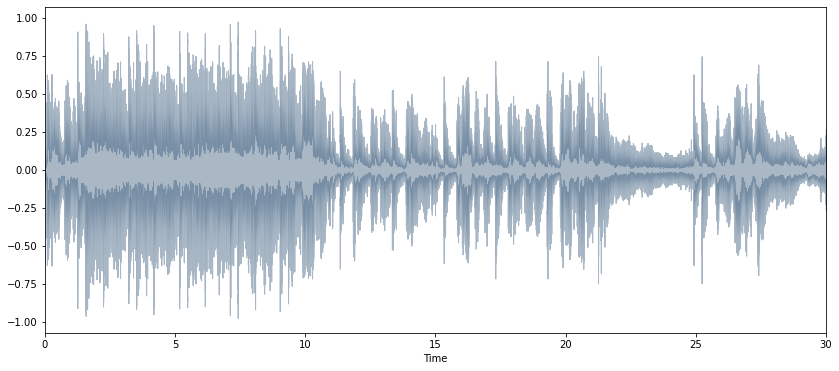

In [81]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveplot(data,sr=sr,alpha=0.4,color="#2B4F72")

# Chroma Feature
It's a useful tool for studying musical aspects whose pitches may be classified and whose tuning is close to the equal-tempered scale. Chromatic and melodic aspects of music are captured by chroma features, which are resistant to changes in timbre and instrumentation.

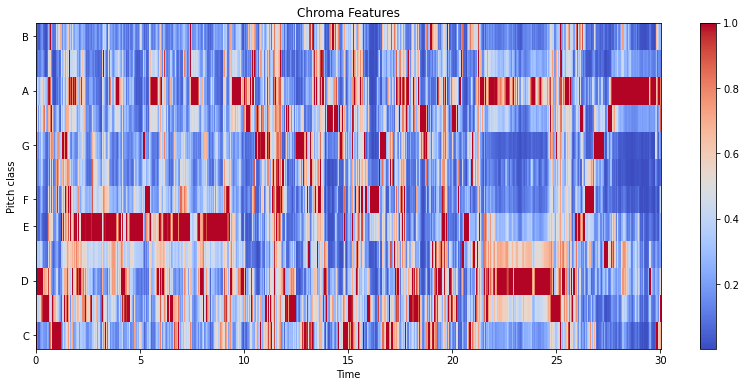

In [82]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

# Zero Crossing
Zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

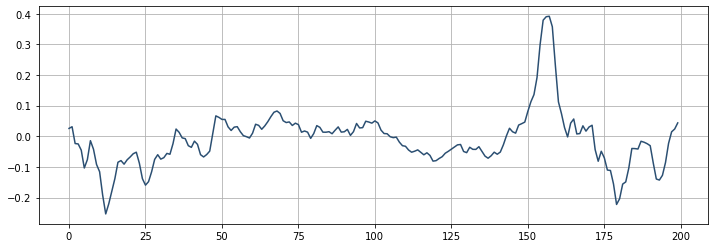

In [83]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [84]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the number of zero_crossings is :", sum(zero_cross_rate))

the number of zero_crossings is : 14


In [85]:
location = 'C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/genres'
print(list(os.listdir(f'{location}')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
os.makedirs('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec')
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train')
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec'

In [7]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = genres.split()

In [ ]:
for g in genres:
  path_audio = os.path.join('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/audio3sec',f'{g}')
  os.makedirs(path_audio)
  path_train = os.path.join('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/train',f'{g}')
  path_test = os.path.join('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/test',f'{g}')
  os. makedirs(path_train)
  os. makedirs(path_test)

In [ ]:
from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/genres/',f"{g}")):

    song  =  os.path.join(f'C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/genres/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #pydub calculates in milliseconds so we multiply the values by 1000
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

In [ ]:
for g in genres:
  j = 10
  print(g)
  for filename in os.listdir(os.path.join('C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/audio3sec',f"{g}")):
    song  =  os.path.join(f'C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/audio3sec/{g}',f'{filename}')
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    melspecname=(f'C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/train/{g}/{g+str(j)}')
    plt.savefig(f'{melspecname}.png', format="png")
    j = j+1

# Spliting Dataset into 70:30 

In [17]:
directory = "C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/train/"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:30]

  for f in test_files:
    shutil.move(directory + f"{g}"+ "/" + f,"C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/test/" + f"{g}")

In [18]:
train_dir = "C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

validation_dir = "C:/Users/dhruv/OneDrive/Desktop/College/SEM 5/ML/Project/spectrograms3sec/test/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)


Found 700 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


 # Building the model
All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the categorical_crossentropy function. Dropout is used to prevent overfitting. We chose the Adam optimizer because it gave us the best results after evaluating other optimizers. The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

In [19]:
def GenreModel(input_shape = (288,432,4),classes=10):
  np.random.seed(10)
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1),kernel_initializer = glorot_uniform(seed=10))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1),kernel_initializer=glorot_uniform(seed=10))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1),kernel_initializer = glorot_uniform(seed=10))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1),kernel_initializer=glorot_uniform(seed=10))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)

  X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=10))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [20]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
  
model = GenreModel(input_shape=(288,432,4),classes=10)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1]) 

history = model.fit_generator(train_generator,epochs=70,validation_data=vali_generator)



Epoch 1/70
6/6 [==============================] - 32s 5s/step - loss: 6.3178 - accuracy: 0.2157 - get_f1: 0.1790 - val_loss: 2.3132 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 2/70
6/6 [==============================] - 27s 5s/step - loss: 4.9534 - accuracy: 0.3229 - get_f1: 0.3288 - val_loss: 2.3338 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 3/70
6/6 [==============================] - 27s 4s/step - loss: 2.5521 - accuracy: 0.3329 - get_f1: 0.3038 - val_loss: 2.2927 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 4/70
6/6 [==============================] - 27s 4s/step - loss: 1.8248 - accuracy: 0.4557 - get_f1: 0.4249 - val_loss: 2.2240 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 5/70
6/6 [==============================] - 27s 4s/step - loss: 1.3153 - accuracy: 0.5614 - get_f1: 0.5254 - val_loss: 2.1319 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 6/70
6/6 [==============================] - 28s 5s/step - loss: 1.1835 - accuracy: 0.5929 - ge

In [23]:
model.summary()

Model: "GenreModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 288, 432, 4)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 286, 430, 8)       296       
_________________________________________________________________
batch_normalization_8 (Batch (None, 286, 430, 8)       32        
_________________________________________________________________
activation_8 (Activation)    (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 143, 215, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 141, 213, 16)      1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 141, 213, 16)      6

# Model Evaluation

In [25]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [26]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    fig.tight_layout(pad=2.0)
    
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

In [27]:
history.history

{'loss': [6.317819595336914,
  4.953391075134277,
  2.5521090030670166,
  1.824791431427002,
  1.31525719165802,
  1.18354332447052,
  1.0584182739257812,
  0.855908989906311,
  0.7622407674789429,
  0.7413599491119385,
  0.6685717105865479,
  0.5266452431678772,
  0.46307817101478577,
  0.4062390625476837,
  0.3485688865184784,
  0.27912673354148865,
  0.2700082063674927,
  0.22970637679100037,
  0.18292972445487976,
  0.2350260317325592,
  0.1962164342403412,
  0.16953660547733307,
  0.1120789647102356,
  0.09155784547328949,
  0.07815614342689514,
  0.06706885248422623,
  0.050453342497348785,
  0.047766853123903275,
  0.04341728612780571,
  0.0399395190179348,
  0.033307310193777084,
  0.030482640489935875,
  0.029386373236775398,
  0.024796992540359497,
  0.022470101714134216,
  0.02045663259923458,
  0.019020598381757736,
  0.017763255164027214,
  0.017024124041199684,
  0.01562936045229435,
  0.014512907713651657,
  0.01430227980017662,
  0.013540763407945633,
  0.01345757301896

<Figure size 1440x1080 with 0 Axes>

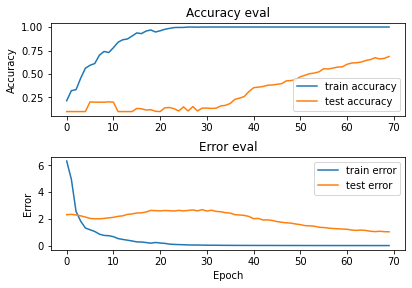

In [28]:
plot_history(history)

Validation Accuracy 0.6866666674613953


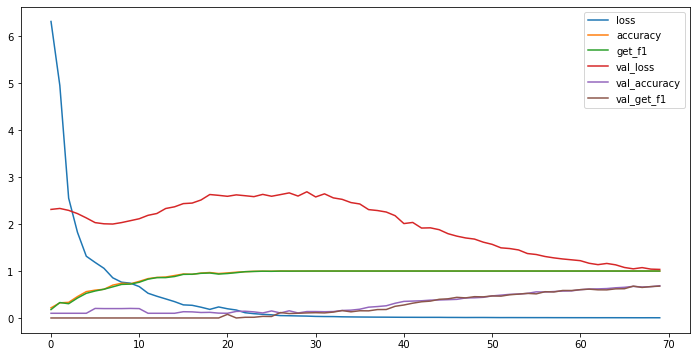

In [29]:
plotValidate(history)

# Prediction

In [52]:
class_labels = ['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',               
 'metal',
 'pop',
 'reggae',
 'rock']

In [42]:
def extract_relevant(s,t1,t2):
  wav_file = os.path.join(f'C:/Users/dhruv/OneDrive/Desktop/',f'{s}')
  wav = AudioSegment.from_wav(wav_file)
  wav = wav[1000*t1:1000*t2]
  wav.export("extracted.wav",format='wav')

In [43]:
def create_melspectrogram(wav_file):
  y,sr = librosa.load(wav_file,duration=3)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig('melspectrogram.png')

In [44]:
def predict(image_data,model):

  #image = image_data.resize((288,432))
  image = img_to_array(image_data)

  image = np.reshape(image,(1,288,432,4))

  prediction = model.predict(image/255)

  prediction = prediction.reshape((10,)) 

  class_label = np.argmax(prediction)

  return class_label,prediction

In [110]:
def show_output(songname):
  #convert_mp3_to_wav(songname + ".mp3")
  extract_relevant(songname,40,50)
  create_melspectrogram("extracted.wav") 
  image_data = load_img('melspectrogram.png',color_mode='rgba',target_size=(288,432))

  class_label,prediction = predict(image_data,model)

  print("## The Genre of Song is ",class_labels[class_label])

  prediction = prediction.reshape((10,)) 
  
  color_data = [1,2,3,4,5,6,7,8,9,10]
  my_cmap = cm.get_cmap('jet')
  my_norm = Normalize(vmin=0, vmax=10)

  fig,ax= plt.subplots(figsize=(6,4.5))
  ax.bar(x=class_labels,height=prediction,
  color=my_cmap(my_norm(color_data)))
  plt.xticks(rotation=45)
  ax.set_title("Probability Distribution Of The Given Song Over Different Genres")
  plt.show()
  #st.pyplot(fig)

  #st.image("melspectrogram.png",use_column_width=True)

## The Genre of Song is  country


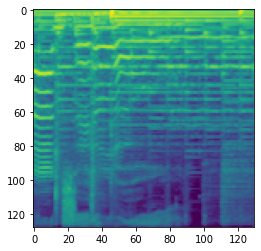

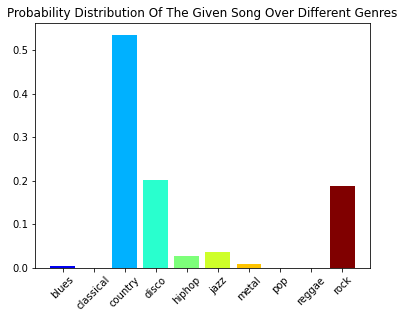

In [111]:
song ="Taylor Swift-Love Story.wav"
location = os.path.join(f'C:/Users/dhruv/OneDrive/Desktop/',f'{s}')
show_output(song)